# WELCOME TO FIFA 20 ANALYSIS

![Fifa](https://media.contentapi.ea.com/content/dam/ea/fifa/fifa-20/global-assets/common/fifa20-grid-tile-requirements-16x9.png.adapt.crop191x100.1200w.png)

FIFA 20 is one of the best games over the past 20 years and very popular all over the world.
In this notebook I'll analyze the data of the players in FIFA 20 and I'll train 2 Machine Learning models (Linear Regression & Gradient Boosting Regressor) and compare their results.

#### If you find this notebook helpful, Please **Upvote** this notebook, This would be **GREATLY** appreciated. Your feedback is also very important to me

##### This Notebook helped me alot: [FIFA19 Notebook](https://www.kaggle.com/nitindatta/fifa-in-depth-analysis-with-linear-regression)

# 1. Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
import plotly.express as px
from IPython.display import Image

In [2]:
# Importing and Exploring the data
fifa_df=pd.read_csv('../input/fifa-20-complete-player-dataset/players_20.csv')
fifa_df.head(3).T

,0,1,2
sofifa_id,158023,20801,190871
player_url,https://sofifa.com/player/158023/lionel-messi/...,https://sofifa.com/player/20801/c-ronaldo-dos-...,https://sofifa.com/player/190871/neymar-da-sil...
short_name,L. Messi,Cristiano Ronaldo,Neymar Jr
long_name,Lionel Andrés Messi Cuccittini,Cristiano Ronaldo dos Santos Aveiro,Neymar da Silva Santos Junior
age,32,34,27
...,...,...,...
lb,63+2,61+3,61+3
lcb,52+2,53+3,46+3
cb,52+2,53+3,46+3
rcb,52+2,53+3,46+3


In [3]:
fifa_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sofifa_id,18278.0,219738.864482,27960.200461,768.0,204445.5,226165.0,240795.75,252905.0
age,18278.0,25.283291,4.656964,16.0,22.0,25.0,29.00,42.0
height_cm,18278.0,181.362184,6.756961,156.0,177.0,181.0,186.00,205.0
weight_kg,18278.0,75.276343,7.047744,50.0,70.0,75.0,80.00,110.0
overall,18278.0,66.244994,6.949953,48.0,62.0,66.0,71.00,94.0
...,...,...,...,...,...,...,...,...
goalkeeping_diving,18278.0,16.572765,17.738069,1.0,8.0,11.0,14.00,90.0
goalkeeping_handling,18278.0,16.354853,16.996925,1.0,8.0,11.0,14.00,92.0
goalkeeping_kicking,18278.0,16.212934,16.613665,1.0,8.0,11.0,14.00,93.0
goalkeeping_positioning,18278.0,16.368038,17.136497,1.0,8.0,11.0,14.00,91.0


In [4]:
fifa_df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

# 2. Data Cleansing

In [5]:
fifa_df.drop(['sofifa_id', 'player_url', 'long_name', 'dob', 'nationality', 
              'joined', 'contract_valid_until', 'loaned_from', 'nation_jersey_number',
              'nation_position', 'player_tags', 'player_traits', 'team_jersey_number',
              'player_positions', 'release_clause_eur', 'real_face', 'body_type', 'ls', 'st', 'rs',
              'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
              'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
              'rcb', 'rb'], axis=1,inplace=True)

In [6]:
metrics = ['team_position', 'short_name', 'age', 'height_cm', 'weight_kg', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate']
fifa_df[metrics].isnull().sum()

team_position               240
short_name                    0
age                           0
height_cm                     0
weight_kg                     0
club                          0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
dtype: int64

###### There're 240 Players don't have team

In [7]:
# Eliminating players with unknown positions
fifa_df.drop(fifa_df[fifa_df['team_position'].isnull()].index, inplace=True)

In [8]:
#Renaming some features
fifa_df.rename(columns={'short_name': 'name', 'height_cm': 'height', 'weight_kg': 'weight',
       'value_eur': 'value', 'wage_eur': 'wage', 'team_position': 'position', 'attacking_crossing': 'crossing',
       'attacking_finishing': 'finishing', 'attacking_heading_accuracy': 'heading_accuracy',
       'skill_fk_accuracy': 'fk_accuracy', 'skill_long_passing': 'long_passing',
       'skill_ball_control': 'ball_control', 'movement_acceleration': 'acceleration', 'movement_sprint_speed': 'sprint_speed',
       'mentality_penalties': 'penalties_accuracy', 'power_shot_power': 'shot_power', 'power_jumping': 'jumping', 
       'power_stamina': 'stamina', 'power_strength': 'strength','power_long_shots': 'long_shots', 'defending_marking': 'marking'}, inplace=True)
fifa_df.columns

Index(['name', 'age', 'height', 'weight', 'club', 'overall', 'potential',
       'value', 'wage', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'position', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'crossing', 'finishing', 'heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'acceleration', 'sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'shot_power', 'jumping',
       'stamina', 'strength', 'long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
       'penalties_accuracy', 'mentality_composure', 'marking',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving

# 3. Data Analysis

## Players Analysis

In [9]:
metrics = ['overall', 'potential', 'value', 'wage', 'finishing', 'dribbling', 'mentality_vision',
           'fk_accuracy', 'shot_power', 'penalties_accuracy', 'pace', 'passing', 'defending', 'marking']

for i in metrics:
    best_Overall = fifa_df.loc[fifa_df[i] == fifa_df[i].max(), ['name', i]].values.tolist()
    print('Top', i, ': ', best_Overall[0][0], '-->', best_Overall[0][1])

Top overall :  L. Messi --> 94
Top potential :  K. Mbappé --> 95
Top value :  Neymar Jr --> 105500000
Top wage :  L. Messi --> 565000
Top finishing :  L. Messi --> 95
Top dribbling :  L. Messi --> 96.0
Top mentality_vision :  L. Messi --> 94
Top fk_accuracy :  L. Messi --> 94
Top shot_power :  Cristiano Ronaldo --> 95
Top penalties_accuracy :  M. Kruse --> 92
Top pace :  K. Mbappé --> 96.0
Top passing :  L. Messi --> 92.0
Top defending :  V. van Dijk --> 90.0
Top marking :  G. Chiellini --> 94


### Relation between Speed and Balance

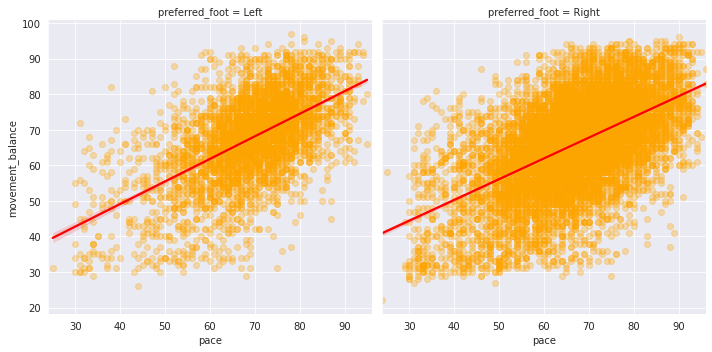

In [10]:
sns.lmplot(x = 'pace', y = 'movement_balance', data = fifa_df, col = 'preferred_foot',scatter_kws = {'alpha':0.3,'color':'orange'},
           line_kws={'color':'red'})

### Relation between Free Kicks Accuracy & Penalties Accuracy

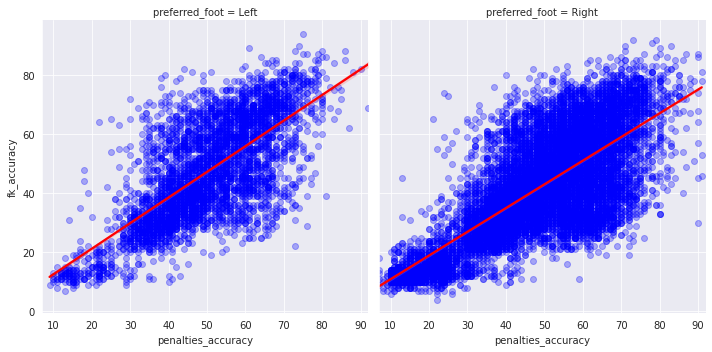

In [11]:
sns.lmplot(x = 'penalties_accuracy', y = 'fk_accuracy', data = fifa_df, col = 'preferred_foot',scatter_kws = {'alpha':0.3,'color':'blue'},
           line_kws={'color':'red'})

### Relation Between Finishing Ability & Shooting

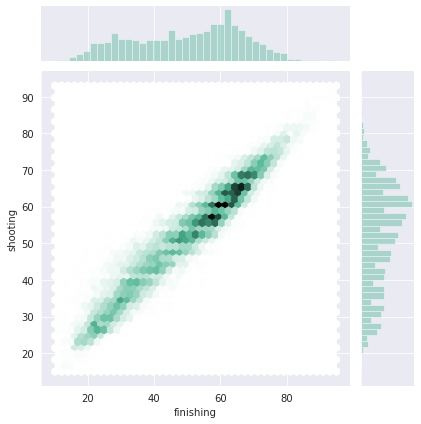

In [12]:
sns.jointplot(x="finishing", y="shooting", data=fifa_df, kind="hex", color="#4CB391")


### Dribbling VS ( Balance - Speed )

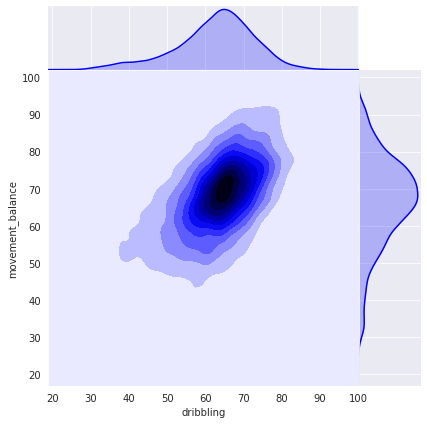

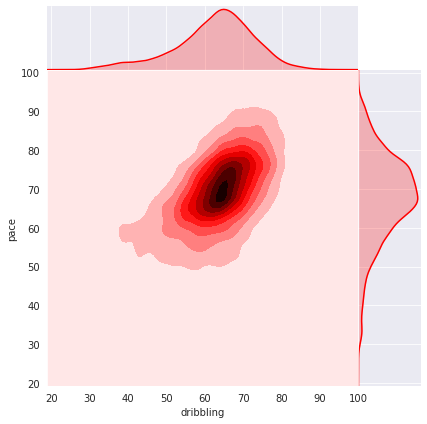

In [13]:
sns.jointplot(x="dribbling", y="movement_balance", data=fifa_df, kind="kde", space=0, color="blue")
sns.jointplot(x="dribbling", y="pace", data=fifa_df, kind="kde", space=0, color="red")

### Relation Between Free Kick Accuracy & Long Shots Power

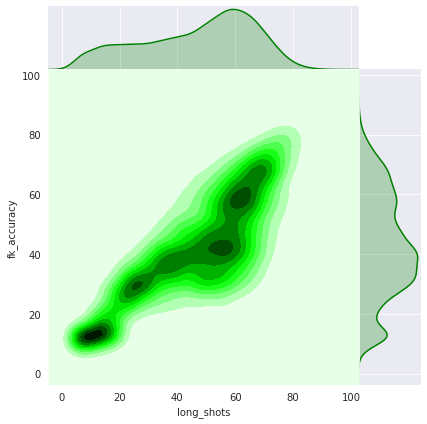

In [14]:
sns.jointplot(x="long_shots", y="fk_accuracy", data=fifa_df, kind="kde", space=0, color="g")

### Age Effect On Overall Rate

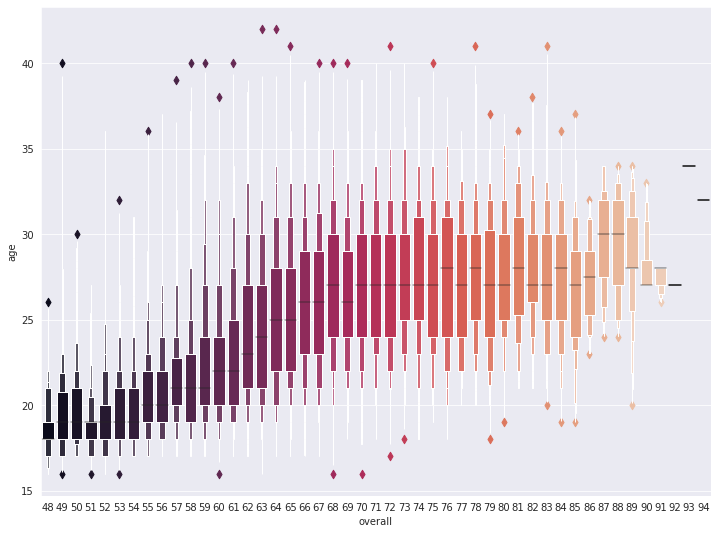

In [15]:
fig = plt.gcf()
fig.set_size_inches(12, 9)

sns.boxenplot(fifa_df['overall'], fifa_df['age'], palette = 'rocket')

### Age Effect On Other Metrics

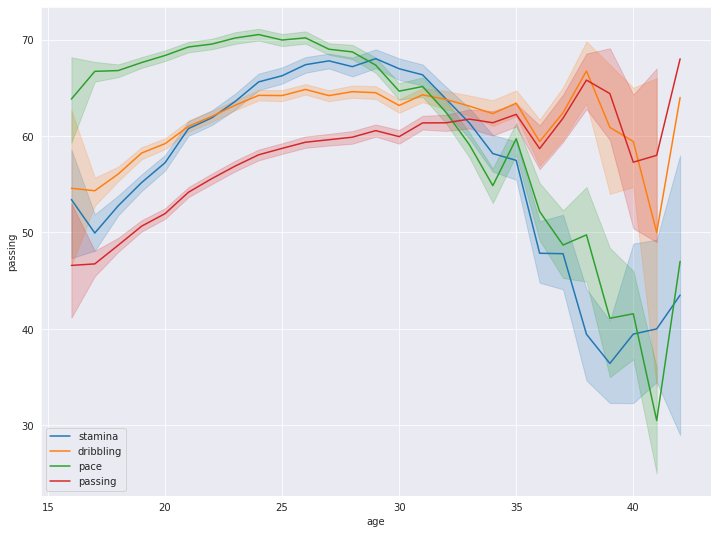

In [16]:
fig = plt.gcf()
fig.set_size_inches(12, 9)

sns.lineplot(x='age', y='stamina', data=fifa_df, legend='brief', label='stamina')
sns.lineplot(x='age', y='dribbling', data=fifa_df, legend='brief', label='dribbling')
sns.lineplot(x='age', y='pace', data=fifa_df, legend='brief', label='pace')
sns.lineplot(x='age', y='passing', data=fifa_df, legend='brief', label='passing')

In [17]:
fig = px.bar(fifa_df, x='age', y='value',
             hover_data=['age', 'value', 'overall'], color='value',
             labels={'pop':'Players Market Value Based On Their Age'}, height=600, title='Players Value Based On Their Age')
fig.show()

# 4. CREATING MODEL

In [18]:
encoding = {"preferred_foot": {"Left": 1, "Right": 0},
      'position': {'RW': 'ST', 'LW': 'ST', 'CAM': 'AM', 'GK': 'GK', 'RCM': 'MF', 'LCB': 'DF', 'ST': 'ST', 'CDM': 'DM', 'LDM': 'DM', 'RM': 'MF',
                   'RCB': 'DF', 'LCM': 'MF', 'LM': 'MF', 'CF': 'ST', 'SUB': 'SUB', 'LB': 'DF', 'LS': 'ST', 'RB': 'DF', 'RDM': 'DM', 'RES': 'RES', 'RAM': 'AM',
                   'RS': 'ST', 'RF': 'ST', 'CM': 'MF', 'LF': 'ST', 'CB': 'DF', 'LAM': 'AM', 'RWB': 'DF', 'LWB': 'DF'}
     }
# Unify the Players postions as GK | DF | DM | MF | AM | SF
# Apply Ordinal Encoding on preferred_foot column
fifa_df.replace(encoding, inplace=True)

In [19]:
fifa_df.drop(['club', 'weight', 'height', 'wage', 'name', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning'], axis=1, inplace=True)

In [20]:
df = fifa_df.dropna()
OHE = pd.get_dummies(fifa_df.position)
df = pd.concat([fifa_df,OHE], axis=1)
work_rate = pd.get_dummies(fifa_df.work_rate)
df = pd.concat([df,work_rate], axis=1)
df.head(10)

,age,overall,potential,value,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,position,...,SUB,High/High,High/Low,High/Medium,Low/High,Low/Low,Low/Medium,Medium/High,Medium/Low,Medium/Medium
0,32,94,94,95500000,1,5,4,4,Medium/Low,ST,...,0,0,0,0,0,0,0,0,1,0
1,34,93,93,58500000,0,5,4,5,High/Low,ST,...,0,0,1,0,0,0,0,0,0,0
2,27,92,92,105500000,0,5,5,5,High/Medium,AM,...,0,0,0,1,0,0,0,0,0,0
3,26,91,93,77500000,0,3,3,1,Medium/Medium,GK,...,0,0,0,0,0,0,0,0,0,1
4,28,91,91,90000000,0,4,4,4,High/Medium,ST,...,0,0,0,1,0,0,0,0,0,0
5,28,91,91,90000000,0,4,5,4,High/High,MF,...,0,1,0,0,0,0,0,0,0,0
6,27,90,93,67500000,0,3,4,1,Medium/Medium,GK,...,0,0,0,0,0,0,0,0,0,1
7,27,90,91,78000000,0,3,3,2,Medium/Medium,DF,...,0,0,0,0,0,0,0,0,0,1
8,33,90,90,45000000,0,4,4,4,High/High,MF,...,0,1,0,0,0,0,0,0,0,0
9,27,90,90,80500000,1,3,3,4,High/Medium,ST,...,0,0,0,1,0,0,0,0,0,0


In [21]:
df.drop(['work_rate', 'position'], axis=1, inplace=True)

In [22]:
# Defining Label Field & Remove it From The Data
label = df['overall'].values
df.drop(['overall'], axis=1, inplace=True)

In [23]:
# Split the Data into 70% - 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3)

In [24]:
# Check Data Size
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(5412, 58) (12626, 58)
(5412,) (12626,)


## Training Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score


model_LR = LinearRegression() # Initialize Linear Model


# Using Grid Search for tuning Hyperparameters
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_LR = GridSearchCV(model_LR,parameters, cv=None)
grid_LR.fit(X_train, y_train)
predictions = grid_LR.predict(X_test)


# Check Best Parameter for the Model
print("Best Parameters for the Model: ", grid_LR.best_params_)


# Check Model Score
print("\nR2: ", grid_LR.best_score_)
print("Residual sum of squares: ",  np.mean((predictions - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, predictions))))

Best Parameters for the Model:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}

R2:  0.9362225734119342
Residual sum of squares:  2.9611177760543246
RMSE: 1.7207898698139539


In [26]:
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(grid_LR.best_estimator_, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
7600257921398169665536.0000 ± 185989711415572955136.0000,SUB
4158087021409504591872.0000 ± 40922793526506176512.0000,RES
3999892652651010588672.0000 ± 84348694105826869248.0000,DF
2733182999082330226688.0000 ± 86595058259714801664.0000,MF
2359468688759390470144.0000 ± 86383434710251044864.0000,Medium/Medium
2125808999285991931904.0000 ± 43451230461943709696.0000,ST
1409267529717972467712.0000 ± 34759239198306177024.0000,High/Medium
1226295033807806922752.0000 ± 27904669059689861120.0000,DM
1148929904556418400256.0000 ± 26331289293465829376.0000,GK
811818965301314453504.0000 ± 13116601702984605696.0000,Medium/High


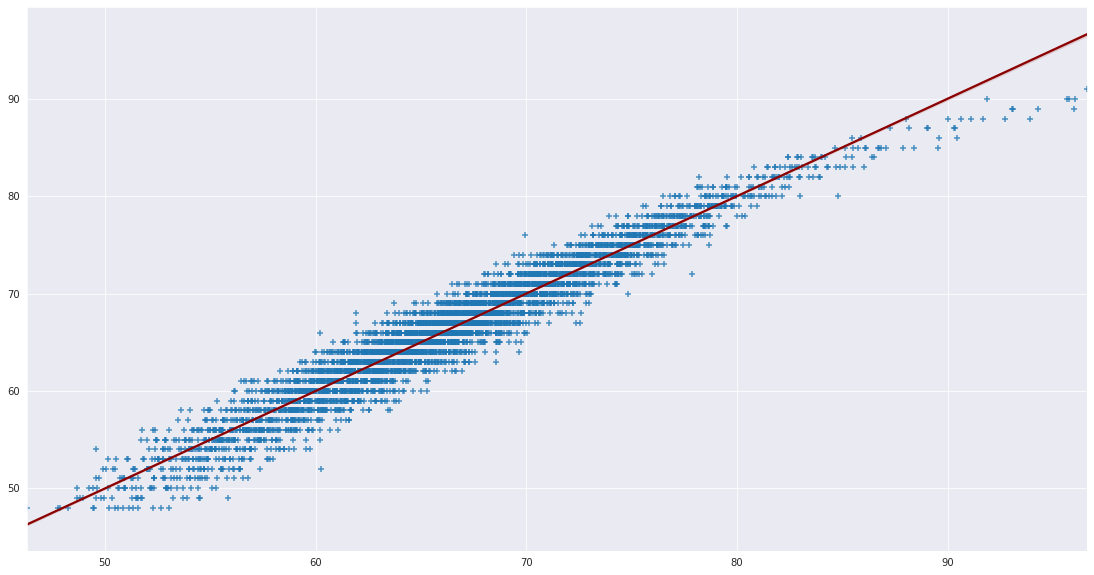

In [27]:
# Plot The Fitted Model
plt.figure(figsize=(19,10))
sns.regplot(predictions,y_test, marker="+", line_kws={'color':'darkred','alpha':1.0})

## Training Gradient Boosting Model

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

model_GB = GradientBoostingRegressor() # Initialize GB Model

# Scoring Metrics that qill be used in fitting the model.
scoring_metrics = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# Using Grid Search for tuning Hyperparameters
parameters = {
    
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth":[3, 6, 10],
    "n_estimators":[100],
    'min_samples_leaf': [5,10],
    'min_samples_split': [5,10]
}

# Using GridSearch for tuning the HyperParameters
grid_GB = GridSearchCV(model_GB, parameters, cv=10, n_jobs=-1)
grid_GB.fit(X_train, y_train)
predictions = grid_GB.predict(X_test)


# Check Best Parameter for the Model
print("Best Parameters for the Model: ", grid_GB.best_params_)


# Check Model Score
print("\nR2: ", grid_GB.best_score_)
print("Residual sum of squares: ",  np.mean((predictions - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, predictions))))

Best Parameters for the Model:  {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}

R2:  0.997687686368524
Residual sum of squares:  0.10174836749931118
RMSE: 0.31898019922764986


In [29]:
perm = PermutationImportance(grid_GB.best_estimator_, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.5004 ± 0.0565,value
0.2583 ± 0.0072,age
0.0960 ± 0.0026,potential
0.0002 ± 0.0000,finishing
0.0002 ± 0.0000,movement_reactions
0.0002 ± 0.0000,goalkeeping_diving
0.0002 ± 0.0001,goalkeeping_reflexes
0.0001 ± 0.0000,defending_sliding_tackle
0.0001 ± 0.0000,defending_standing_tackle
0.0001 ± 0.0000,crossing


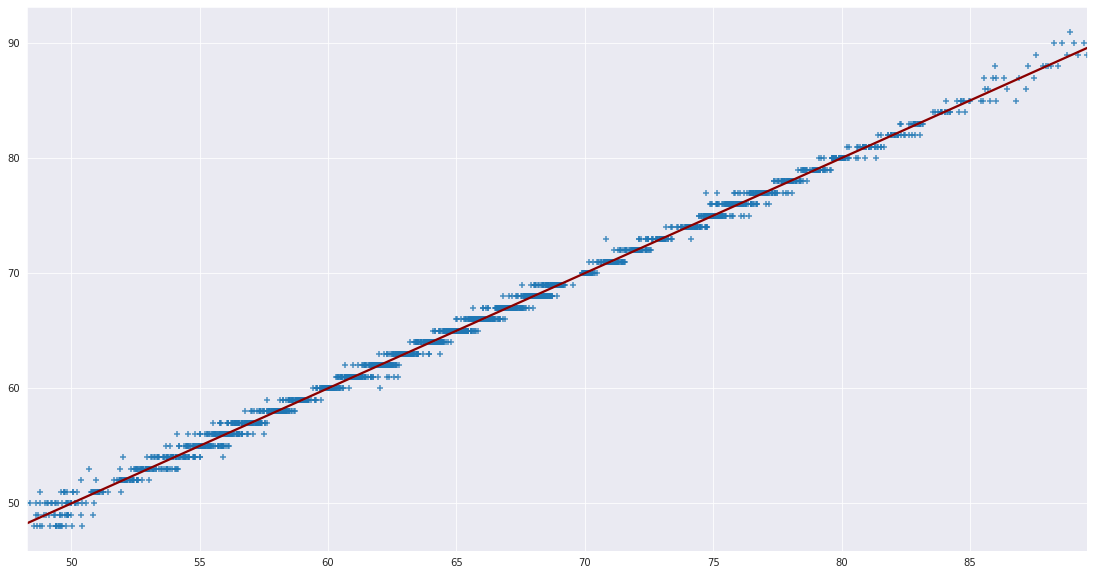

In [30]:
plt.figure(figsize=(19,10))
sns.regplot(predictions,y_test, marker="+", line_kws={'color':'darkred','alpha':1.0})

## Compare Models

In [31]:
parameter = pd.DataFrame({'Gradient Boosting':pd.Series(grid_GB.best_params_),'Linear Regression':pd.Series(grid_LR.best_params_)})
score = pd.DataFrame({'Gradient Boosting': grid_GB.best_score_, 'Learning Regression':grid_LR.best_score_}, index=[0])

In [32]:
score

,Gradient Boosting,Learning Regression
0,0.997688,0.936223


In [33]:
parameter

,Gradient Boosting,Linear Regression
copy_X,NaN,True
fit_intercept,NaN,True
learning_rate,0.1,NaN
max_depth,10.0,NaN
min_samples_leaf,5.0,NaN
min_samples_split,5.0,NaN
n_estimators,100.0,NaN
normalize,NaN,True
